# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [3]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.utils import resample

In [4]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [7]:
# 0. Check for missing values

fraud.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
# 0. Check data type

fraud['fraud'].dtype

dtype('float64')

<Axes: xlabel='fraud'>

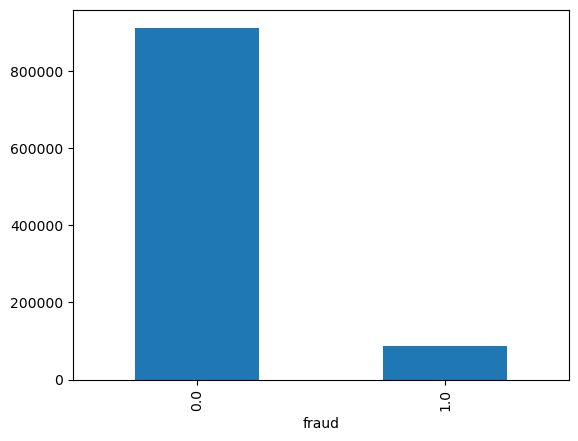

In [9]:
# 1. What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

fraud_counts = fraud['fraud'].value_counts()
fraud_counts.plot(kind='bar')

In [10]:
# 1. Prepare data for ML model

# features
X = fraud.drop(columns=['fraud'])

#target
y = fraud['fraud']

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled_np = scaler.transform(X_train)
X_test_scaled_np = scaler.transform(X_test)


In [12]:
X_train_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

In [13]:
# 2. Train a LogisticRegression.

log_reg = LogisticRegression()

In [14]:
log_reg.fit(X_train_scaled_df, y_train)

LogisticRegression()

In [15]:
log_reg.score(X_test_scaled_df, y_test)

0.95922

In [16]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182615
         1.0       0.89      0.60      0.72     17385

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



3. Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

- The high values in precision and recall suggest that the logistic regression model is very good at predicting the no-fraud instances (fraud == 0), however is slightly less precise to identify fraud correctly (precision score of 0.89) and considerably lower for finding all the correct fraud cases in the test dataset (recall score of 0.6).
- Applying alternative sampling techniques should therefore improve the model's ability to detect fraud cases correctly in the overall test dataset. 

In [18]:
# 4. Run oversample

fraud_train = X_train_scaled_df.copy()
fraud_train['fraud'] = y_train.values
fraud_yes = fraud_train[fraud_train['fraud'] == 1] # 70,018
fraud_no = fraud_train[fraud_train['fraud'] == 0] # 729,982
len(fraud_yes), len(fraud_no)

(70018, 729982)

In [19]:
fraud_yes_oversampled = resample(fraud_yes,
                                    replace=True,
                                    n_samples = len(fraud_no),
                                    random_state=0)

In [20]:
fraud_total = pd.concat([fraud_yes_oversampled, fraud_no])
fraud_total

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
828609,-0.361720,0.209293,2.749213,0.366318,-0.734428,-0.334533,0.73251,1.0
112528,3.267297,-0.091417,0.353832,0.366318,-0.734428,-0.334533,0.73251,1.0
700883,0.050601,-0.063043,1.377882,0.366318,1.361603,-0.334533,0.73251,1.0
623474,-0.394272,0.095175,0.844943,-2.729870,-0.734428,-0.334533,-1.36517,1.0
84653,2.191924,-0.099482,-0.546546,0.366318,-0.734428,-0.334533,0.73251,1.0
...,...,...,...,...,...,...,...,...
963395,0.686916,-0.071705,-0.606513,0.366318,-0.734428,-0.334533,0.73251,0.0
117952,-0.359697,0.294316,0.106885,0.366318,-0.734428,-0.334533,0.73251,0.0
435829,0.002457,-0.023525,-0.477266,0.366318,-0.734428,2.989238,-1.36517,0.0
305711,-0.223923,-0.185220,-0.010973,0.366318,-0.734428,-0.334533,0.73251,0.0


In [21]:
fraud_total_count= fraud_total['fraud'].value_counts()
fraud_total_count

fraud
1.0    729982
0.0    729982
Name: count, dtype: int64

In [22]:
X_fraud_total = fraud_total.drop(columns=['fraud'])
y_fraud_total = fraud_total['fraud']

In [23]:
log_reg = LogisticRegression()
log_reg.fit(X_fraud_total, y_fraud_total)

LogisticRegression()

In [24]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



- The recall for no-fraud is slightly lower than before.
- The precision score for fraud dropped from 0.89 to 0.57.
- At the same time, the model improved the recall score from 0.60 to 0.95.

In [25]:
# 5. Run undersample

fraud_no_undersampled = resample(fraud_no,
                                    replace=False,
                                    n_samples = len(fraud_yes),
                                    random_state=0)

In [26]:
fraud_total2 = pd.concat([fraud_no_undersampled, fraud_yes])
fraud_total2

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
625634,0.264815,-0.177923,0.096183,0.366318,-0.734428,-0.334533,0.73251,0.0
383672,-0.238591,1.546072,-0.556717,0.366318,-0.734428,-0.334533,0.73251,0.0
811356,0.721159,0.005098,-0.547877,0.366318,-0.734428,2.989238,-1.36517,0.0
130270,-0.030997,-0.185533,-0.311518,0.366318,1.361603,-0.334533,0.73251,0.0
483049,-0.284021,-0.174000,-0.436299,0.366318,-0.734428,-0.334533,0.73251,0.0
...,...,...,...,...,...,...,...,...
227838,-0.342637,0.294419,5.726189,0.366318,1.361603,-0.334533,0.73251,1.0
303648,1.397456,-0.140950,-0.600287,0.366318,-0.734428,-0.334533,0.73251,1.0
556209,-0.301153,-0.180941,0.777658,0.366318,-0.734428,-0.334533,0.73251,1.0
370648,1.829827,-0.185883,-0.444220,0.366318,-0.734428,-0.334533,0.73251,1.0


In [27]:
fraud_total2_count= fraud_total2['fraud'].value_counts()
fraud_total2_count

fraud
0.0    70018
1.0    70018
Name: count, dtype: int64

In [28]:
X_fraud_total2 = fraud_total2.drop(columns=['fraud'])
y_fraud_total2 = fraud_total2['fraud']

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_fraud_total2, y_fraud_total2)

LogisticRegression()

In [30]:
y_pred_test_log2 = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log2, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



- Same values as for the overfitting sample. 

In [31]:
# 6. Run SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 1, sampling_strategy=1.0)

In [32]:
X_train_sm, y_train_sm =  sm.fit_resample(X_train_scaled_df, y_train)

In [33]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [67]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

